In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10000-spotify-songs-1960-now/top_10000_1960-now.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
import math
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


In [4]:
df = pd.read_csv('/kaggle/input/top-10000-spotify-songs-1960-now/top_10000_1960-now.csv')

In [5]:
df

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,spotify:track:3kcKlOkQQEPVwxwljbGJ5p,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",spotify:album:2NIChqkijGw4r4Dqfmg0A3,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",2022-06-17,https://i.scdn.co/image/ab67616d0000b273e1cafe...,...,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,NaN,Virgin,"C © 2022 Topic, under exclusive license to Uni..."
9995,spotify:track:5k9QrzJFDAp5cXVdzAi02f,Never Say Never - Radio Edit,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,spotify:album:2n506u3HKN3CaEDvAjv5Ct,Never Say Never,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,2005-10-24,https://i.scdn.co/image/ab67616d0000b273b65ad4...,...,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,NaN,Vicious,"C 2005 Vicious, a division of Vicious Recordin..."
9996,spotify:track:5ydeCNaWDmFbu4zl0roPAH,Groovejet (If This Ain't Love) [feat. Sophie E...,"spotify:artist:4bmymFwDu9zLCiTRUmrewb, spotify...","Spiller, Sophie Ellis-Bextor",spotify:album:20Q3pGpYiyicF32x5L8ppH,Groovejet (If This Ain't Love) [feat. Sophie E...,spotify:artist:4bmymFwDu9zLCiTRUmrewb,Spiller,2000-08-14,https://i.scdn.co/image/ab67616d0000b27342781a...,...,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,NaN,Defected Records,"C © 2021 Defected Records Limited, P ℗ 2021 De..."
9997,spotify:track:0zKbDrEXKpnExhGQRe9dxt,Lay Low,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,spotify:album:0EYKSXXTsON8ZA95BuCoXn,Lay Low,spotify:artist:2o5jDhtH

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [7]:
df.drop('Album Genres', axis=1, inplace=True)

In [8]:
df.dropna(subset=['Album Artist URI(s)', 'Track Name'], inplace=True)

In [9]:
df.drop(['Track URI', 'Artist URI(s)', 'Album URI', 'Album Artist URI(s)', 'Album Image URL', 'Track Preview URL', 'Copyrights', 'ISRC', 'Added By', 'Added At', 'Disc Number', 'Track Number', 'Artist Genres', 'Label'], axis=1, inplace=True)

In [10]:
df['Key']

0        8.0
1        2.0
2        7.0
3        9.0
4        0.0
        ... 
9994    11.0
9995     9.0
9996     9.0
9997     1.0
9998     5.0
Name: Key, Length: 9996, dtype: float64

In [11]:
df.nunique()

Track Name              8256
Artist Name(s)          4128
Album Name              6634
Album Artist Name(s)    3294
Album Release Date      3331
Track Duration (ms)     7319
Explicit                   2
Popularity                99
Danceability             779
Energy                   876
Key                       12
Loudness                6328
Mode                       2
Speechiness             1059
Acousticness            2746
Instrumentalness        3028
Liveness                1361
Valence                  994
Tempo                   8621
Time Signature             5
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track Name            9996 non-null   object 
 1   Artist Name(s)        9996 non-null   object 
 2   Album Name            9996 non-null   object 
 3   Album Artist Name(s)  9996 non-null   object 
 4   Album Release Date    9996 non-null   object 
 5   Track Duration (ms)   9996 non-null   int64  
 6   Explicit              9996 non-null   bool   
 7   Popularity            9996 non-null   int64  
 8   Danceability          9996 non-null   float64
 9   Energy                9996 non-null   float64
 10  Key                   9996 non-null   float64
 11  Loudness              9996 non-null   float64
 12  Mode                  9996 non-null   float64
 13  Speechiness           9996 non-null   float64
 14  Acousticness          9996 non-null   float64
 15  Instrumentalness     

In [13]:
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'])

In [14]:
df['Month'] = df['Album Release Date'].dt.month
df['Year'] = df['Album Release Date'].dt.year
df['Day'] = df['Album Release Date'].dt.day

In [15]:
df.drop('Album Release Date', axis=1, inplace=True)

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track Name            9996 non-null   object 
 1   Artist Name(s)        9996 non-null   object 
 2   Album Name            9996 non-null   object 
 3   Album Artist Name(s)  9996 non-null   object 
 4   Track Duration (ms)   9996 non-null   int64  
 5   Explicit              9996 non-null   bool   
 6   Popularity            9996 non-null   int64  
 7   Danceability          9996 non-null   float64
 8   Energy                9996 non-null   float64
 9   Key                   9996 non-null   float64
 10  Loudness              9996 non-null   float64
 11  Mode                  9996 non-null   float64
 12  Speechiness           9996 non-null   float64
 13  Acousticness          9996 non-null   float64
 14  Instrumentalness      9996 non-null   float64
 15  Liveness             

In [18]:
'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Key', 'Popularity', 'Track Duration (ms)'

('Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Key',
 'Popularity',
 'Track Duration (ms)')

In [19]:
df

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Track Duration (ms),Explicit,Popularity,Danceability,Energy,Key,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Month,Year,Day
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,216270,False,0,0.617,0.872,8.0,...,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,8,1992,3
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,237120,False,64,0.825,0.743,2.0,...,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,10,2009,23
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,312533,False,56,0.677,0.665,7.0,...,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,1,1999,12
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,233400,False,42,0.683,0.728,9.0,...,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,10,2014,20
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,448720,False,0,0.319,0.627,0.0,...,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,12,1969,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,Kernkraft 400 (A Better Day),"Topic, A7S",Kernkraft 400 (A Better Day),"Topic, A7S",165800,False,79,0.623,0.727,11.0,...,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,6,2022,17
9992,Never Say Never - Radio Edit,Vandalism,Never Say Never,Vandalism,176640,False,17,0.720,0.841,9.0,...,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,10,2005,24
9993,Groovejet (If This Ain't Love) [feat. Sophie E...,"Spiller, Sophie Ellis-Bextor",Groovejet (If This Ain't Love) [feat. Sophie E...,Spiller,227619,False,62,0.719,0.806,9.0,...,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,8,2000,14
9994,Lay Low,Tiësto,Lay Low,Tiësto,153442,False,87,0.534,0.855,1.0,...,0.1830,0.060700,0.000263,0.3460,0.420,122.060,4.0,1,2023,6


In [20]:
top_artists = df['Artist Name(s)'].value_counts().head(10)

In [21]:
yearly_data = df.groupby('Year').agg({'Track Name': 'count', 'Popularity': 'mean'})

# Rename the columns for clarity
yearly_data.rename(columns={'Track Name': 'Track Count', 'Popularity': 'Average Popularity'}, inplace=True)

In [22]:
characteristics = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Key', 'Explicit', 'Popularity', 'Track Duration (ms)']
average_characteristics_by_explicitness = df.groupby('Explicit')[characteristics].mean()


In [23]:
correlation_matrix = df[characteristics + ['Popularity']].corr()

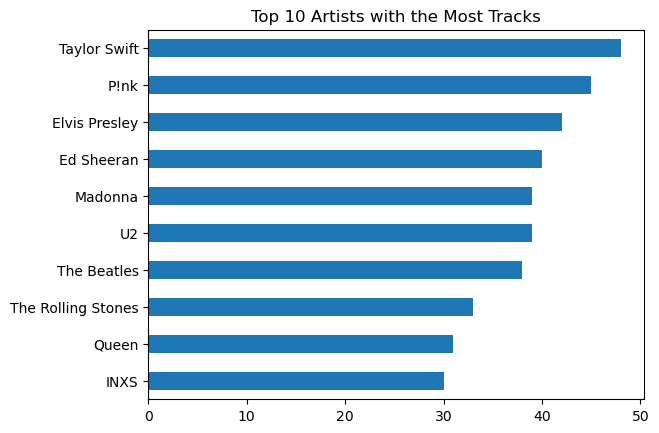

In [24]:
# Plot the top 10 artists with the most tracks
ax = top_artists.plot(kind='barh')
plt.title('Top 10 Artists with the Most Tracks')
ax.invert_yaxis()

Text(0.5, 1.0, 'Yearly Track Count')

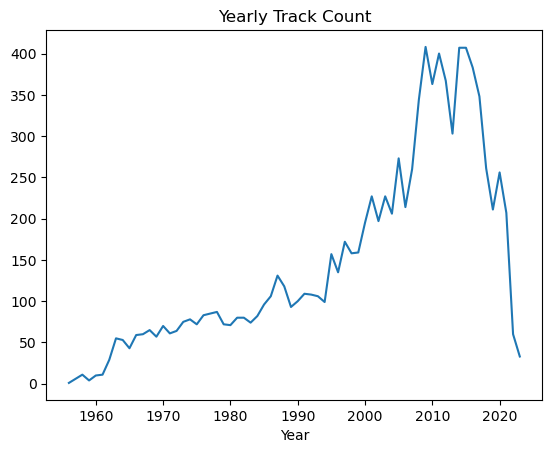

In [25]:

# Plot the yearly track count
yearly_data['Track Count'].plot()
plt.title('Yearly Track Count')

Text(0.5, 1.0, 'Yearly Average Popularity')

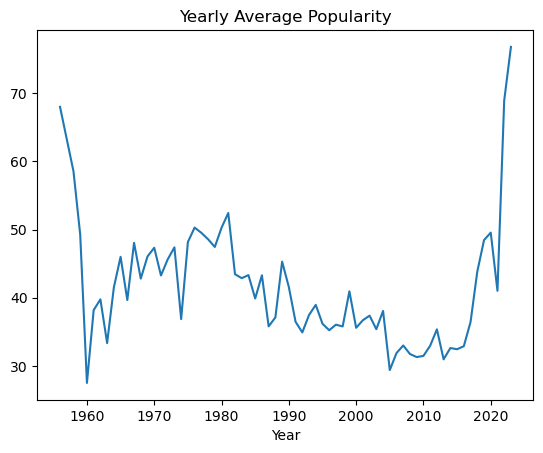

In [26]:

# Plot the yearly average popularity
yearly_data['Average Popularity'].plot()
plt.title('Yearly Average Popularity')

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

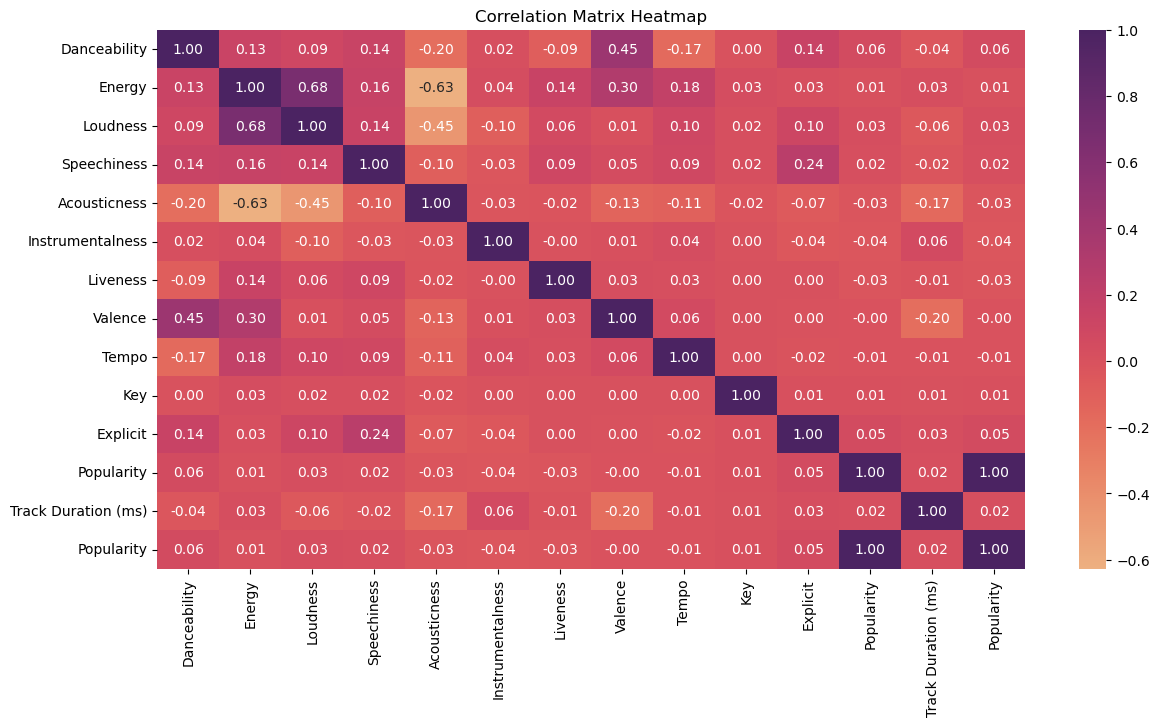

In [27]:
plt.figure(figsize = (14,7))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='flare')
plt.title('Correlation Matrix Heatmap')

In [28]:
average_characteristics_by_year = df.groupby('Year')[characteristics].mean()

Text(0.5, 1.0, 'Average Danceability Over Time')

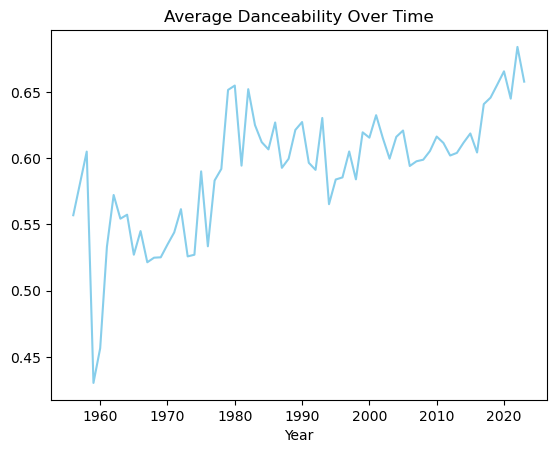

In [29]:
average_characteristics_by_year['Danceability'].plot(color='skyblue')
plt.title('Average Danceability Over Time')

Text(0.5, 1.0, 'Average Energy Over Time')

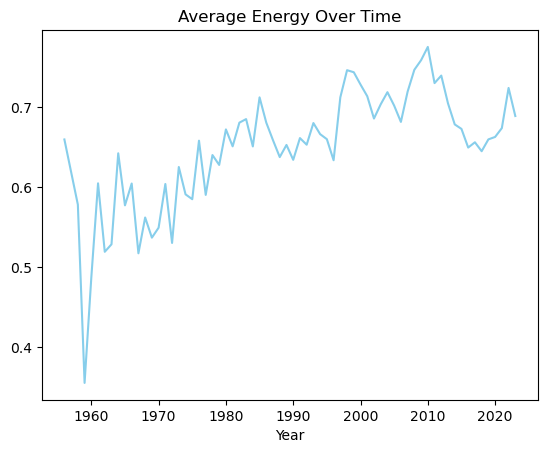

In [30]:
average_characteristics_by_year['Energy'].plot(color='skyblue')
plt.title('Average Energy Over Time')

Text(0.5, 1.0, 'Average Loudness Over Time')

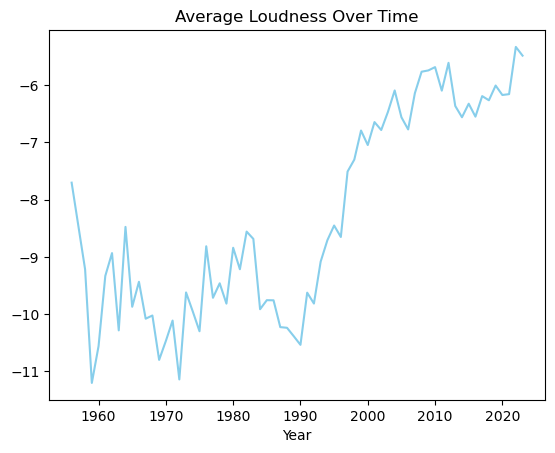

In [31]:
average_characteristics_by_year['Loudness'].plot(color='skyblue')
plt.title('Average Loudness Over Time')

Text(0.5, 1.0, 'Average Speechiness Over Time')

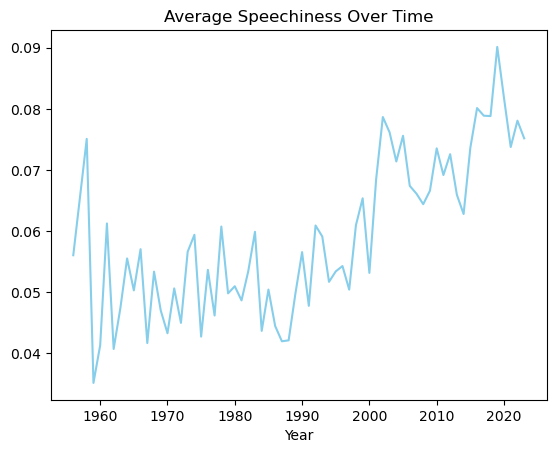

In [32]:
average_characteristics_by_year['Speechiness'].plot(color='skyblue')
plt.title('Average Speechiness Over Time')

Text(0.5, 1.0, 'Average Acousticness Over Time')

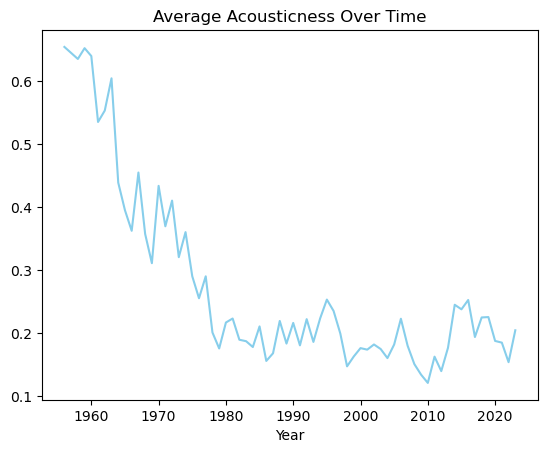

In [33]:
average_characteristics_by_year['Acousticness'].plot(color='skyblue')
plt.title('Average Acousticness Over Time')

Text(0.5, 1.0, 'Proportion of Explicit Tracks Over Time')

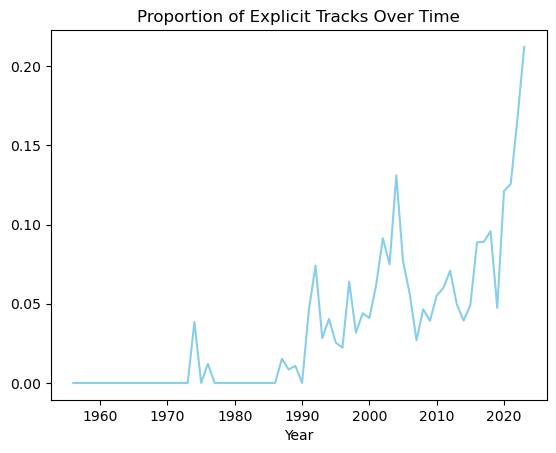

In [34]:
df.groupby('Year')['Explicit'].mean().plot(color='skyblue')
plt.title('Proportion of Explicit Tracks Over Time')


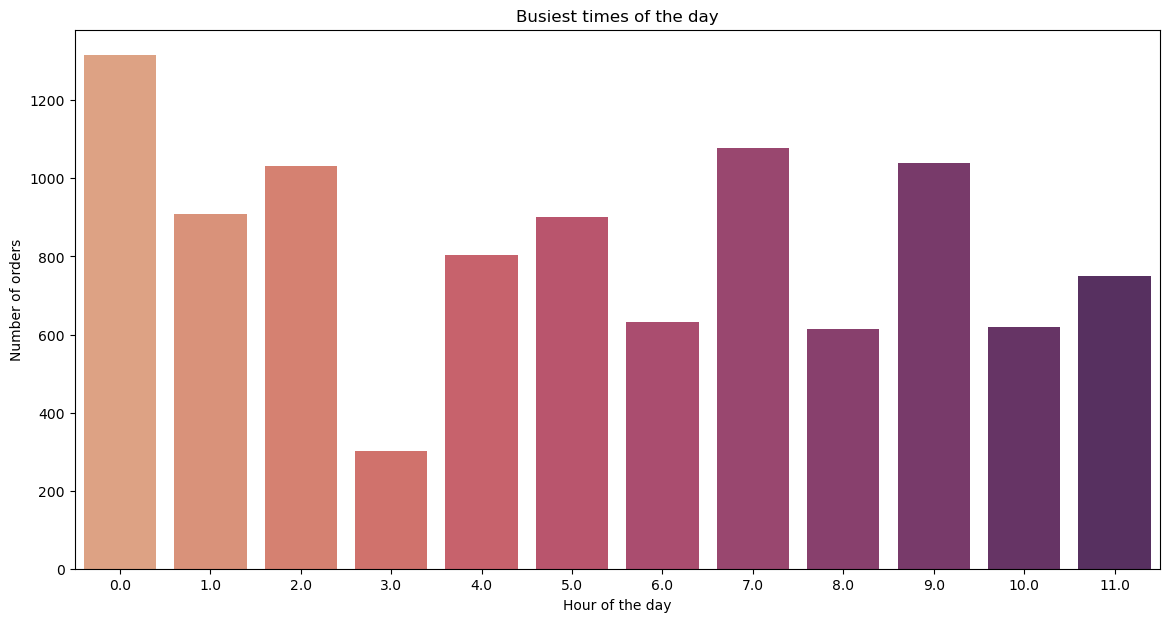

In [35]:
plt.figure(figsize = (14,7))
sns.countplot(data=df, x=df['Key'], palette = 'flare')
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

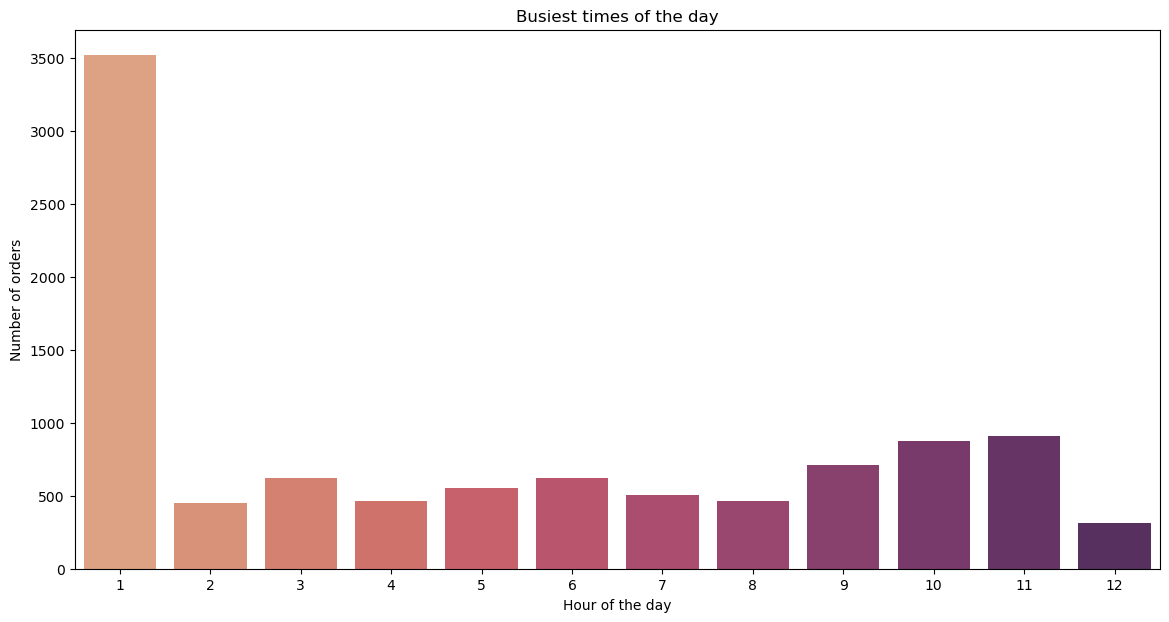

In [36]:
plt.figure(figsize = (14,7))
sns.countplot(data=df, x=df['Month'], palette = 'flare')
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

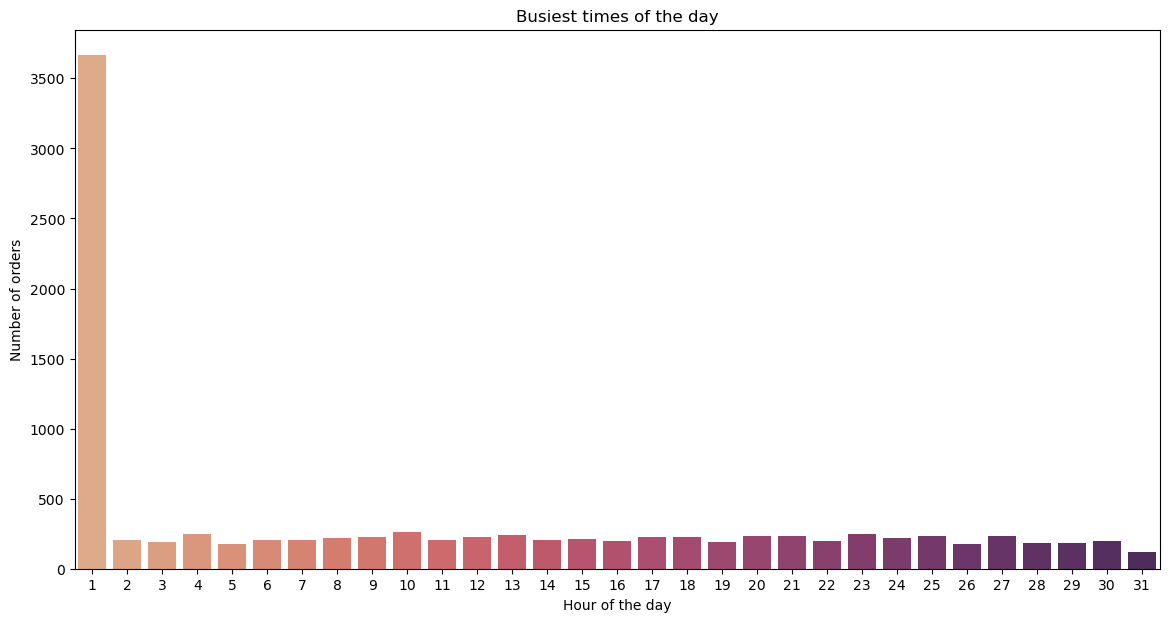

In [37]:
plt.figure(figsize = (14,7))
sns.countplot(data=df, x=df['Day'], palette = 'flare')
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

In [38]:
df.drop(['Mode', 'Day'], axis = 1, inplace=True)

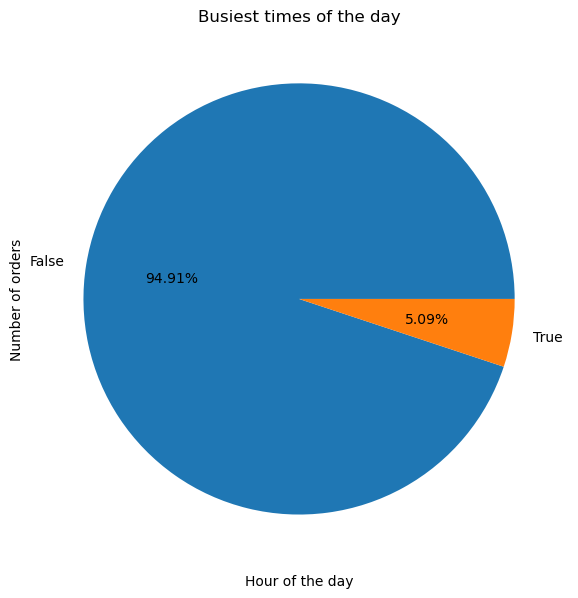

In [39]:
data = df['Explicit'].value_counts()
keys = ['False', 'True']

plt.figure(figsize = (14,7))
plt.pie(data, labels=keys, autopct='%1.2f%%')
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track Name            9996 non-null   object 
 1   Artist Name(s)        9996 non-null   object 
 2   Album Name            9996 non-null   object 
 3   Album Artist Name(s)  9996 non-null   object 
 4   Track Duration (ms)   9996 non-null   int64  
 5   Explicit              9996 non-null   bool   
 6   Popularity            9996 non-null   int64  
 7   Danceability          9996 non-null   float64
 8   Energy                9996 non-null   float64
 9   Key                   9996 non-null   float64
 10  Loudness              9996 non-null   float64
 11  Speechiness           9996 non-null   float64
 12  Acousticness          9996 non-null   float64
 13  Instrumentalness      9996 non-null   float64
 14  Liveness              9996 non-null   float64
 15  Valence              

<Figure size 1400x700 with 0 Axes>

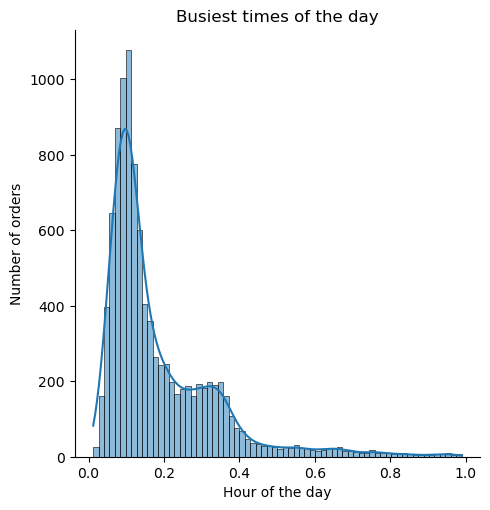

In [41]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Liveness", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

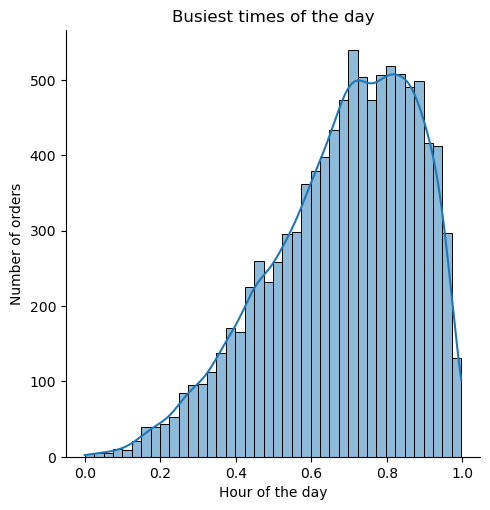

In [42]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Energy", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

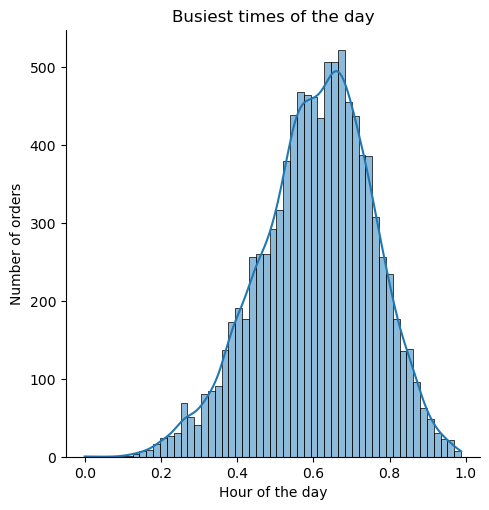

In [43]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Danceability", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

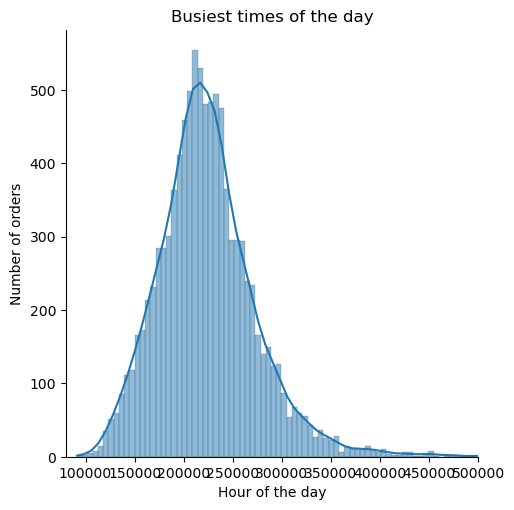

In [44]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Track Duration (ms)", kde=True)
plt.xlim(80000, 500000)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

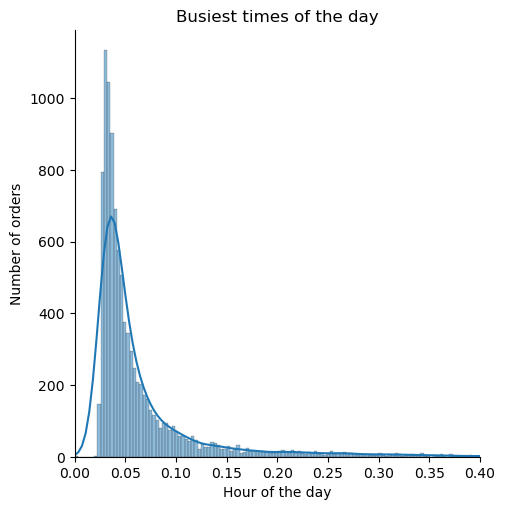

In [45]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Speechiness", kde=True)
plt.xlim(0, 0.4)

plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

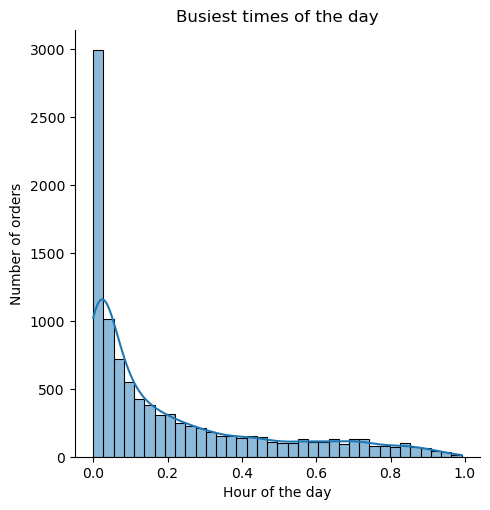

In [46]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Acousticness", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

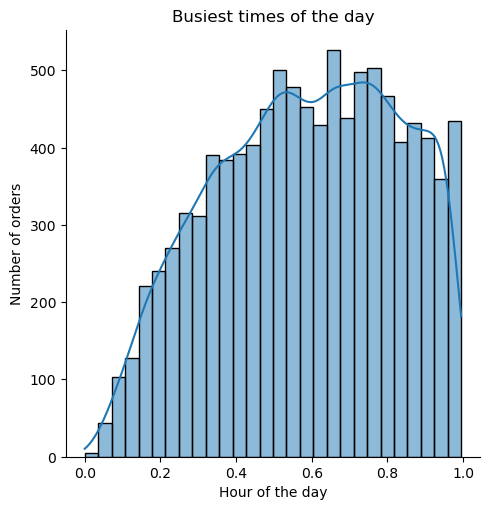

In [47]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Valence", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

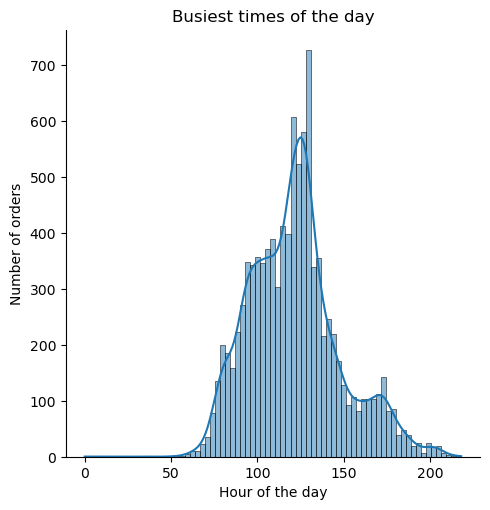

In [48]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Tempo", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

<Figure size 1400x700 with 0 Axes>

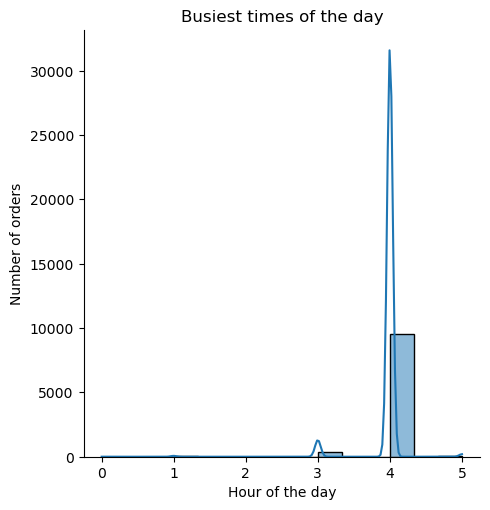

In [49]:
plt.figure(figsize = (14,7))
sns.displot(df, x="Time Signature", kde=True)
plt.title("Busiest times of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.show()

In [50]:
def ZTest(x1,value,s):



    z_value , p_value = ztest(x1 = x1,value =value )
    
    print('Z-score is :{}\n'.format(z_value))
    print('P-value is :{:.50f}\n'.format(p_value))
    
    if p_value<0.05:
        print('Null Hypothesis Rejected\n')
    else:
        print('Null Hypothesis is not Rejected\n')
    
    if(s=='below'):
      if(z_value<0):
        print("Alternative Hypothesis: Accepted \t Left Tailed test \n")
    else:
      if(z_value>0):
        print("Alternative Hypothesis: Accepted \t Right Tailed test \n")

In [51]:
ZTest(df[df['Artist Name(s)']=='Taylor Swift']['Popularity'],df['Popularity'].mean(),'above')


Z-score is :0.42032129652018935

P-value is :0.67425075428525804710488955606706440448760986328125

Null Hypothesis is not Rejected

Alternative Hypothesis: Accepted 	 Right Tailed test 



In [52]:
df['Popularity'].mean()

37.635954381752704

In [53]:
df[df['Artist Name(s)']=='BTS']['Popularity'].mean()

2.0

In [54]:
ZTest(df[df['Artist Name(s)']=='BTS']['Popularity'],df['Popularity'].mean(),'above')


Z-score is :-30.861641782701223

P-value is :0.00000000000000000000000000000000000000000000000000

Null Hypothesis Rejected



In [55]:
df[df['Artist Name(s)']=='Pitbull']['Popularity']

1       64
583     66
4164    28
9827    59
Name: Popularity, dtype: int64

In [56]:
ZTest(df[df['Artist Name(s)']=='Pitbull']['Popularity'],df['Popularity'].mean(),'above')

Z-score is :1.872438539107078

P-value is :0.06114595742186103993764945130351406987756490707397

Null Hypothesis is not Rejected

Alternative Hypothesis: Accepted 	 Right Tailed test 



In [57]:
ZTest(df[df['Artist Name(s)']=='Britney Spears']['Popularity'],df['Popularity'].mean(),'above')

Z-score is :5.505892109461761

P-value is :0.00000003673034377769289673615820757471284174755510

Null Hypothesis Rejected

Alternative Hypothesis: Accepted 	 Right Tailed test 



In [58]:
ZTest(df[df['Artist Name(s)']=='Madonna']['Popularity'],df['Popularity'].mean(),'above')

Z-score is :7.63621221288784

P-value is :0.00000000000002237054880472636784548085395170594463

Null Hypothesis Rejected

Alternative Hypothesis: Accepted 	 Right Tailed test 



In [59]:
significance_level = 0.05
def hypothesisFunc(data, feature):
    df_h1 = data[[feature,"Popularity"]]
    md_h1 = df_h1["Popularity"].median()
    low_pop = df_h1[df_h1["Popularity"] <= md_h1]
    high_pop = df_h1[df_h1["Popularity"] > md_h1]
    ax = sns.kdeplot(low_pop[feature], shade=True, label = "Low Popularity")
    sns.kdeplot(high_pop[feature],  ax=ax, shade=True, label = "High Popularity")
    plt.legend()
    plt.show()
    low_list =[]
    high_list=[]
    for i in range (0,100):
        low_list.append(low_pop.sample(100)[feature].mean())
    for k in range (0,100):
        high_list.append(high_pop.sample(100)[feature].mean())
    t, p_value = stats.ttest_ind(a=low_list, b=high_list, equal_var=False)
    return t,p_value;

def checkHypo(t,p_value):
    print("Test statistic: ",format(t,".2E"))
    print("P value: ",format(p_value,".2E"))
    if p_value < significance_level:
        print("Null hypothesis rejected")
    else:
        print("Null hypothesis failed to reject")
     

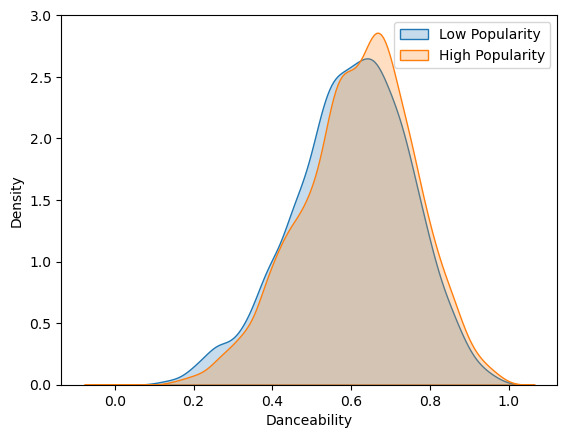

Test statistic:  -8.44E+00
P value:  8.83E-15
Null hypothesis rejected


In [60]:

t_val, p_val = hypothesisFunc(df, "Danceability")
checkHypo(t_val,p_val)

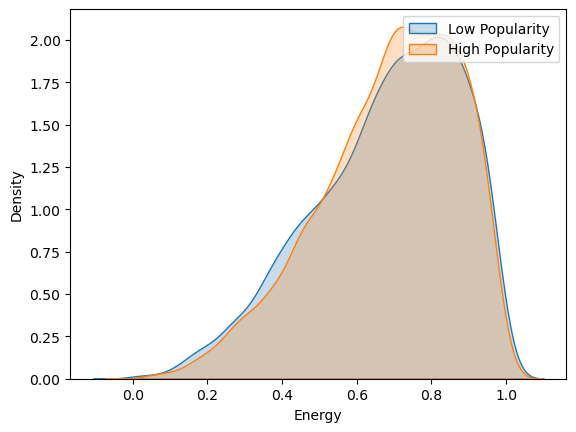

Test statistic:  -2.18E+00
P value:  3.02E-02
Null hypothesis rejected


In [61]:
t_val2, p_val2 = hypothesisFunc(df, "Energy")
checkHypo(t_val2,p_val2)

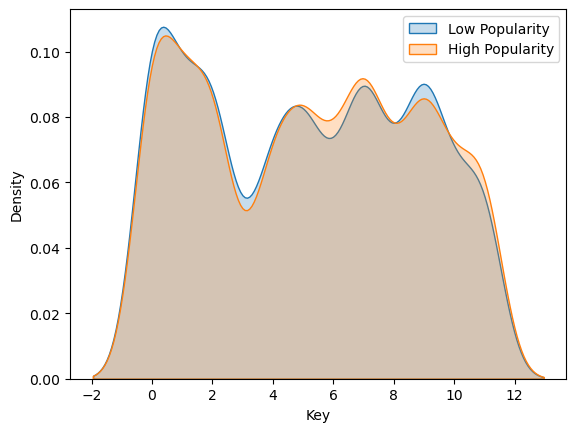

Test statistic:  1.20E+00
P value:  2.32E-01
Null hypothesis failed to reject


In [62]:
t_val3, p_val3 = hypothesisFunc(df, "Key")
checkHypo(t_val3,p_val3)

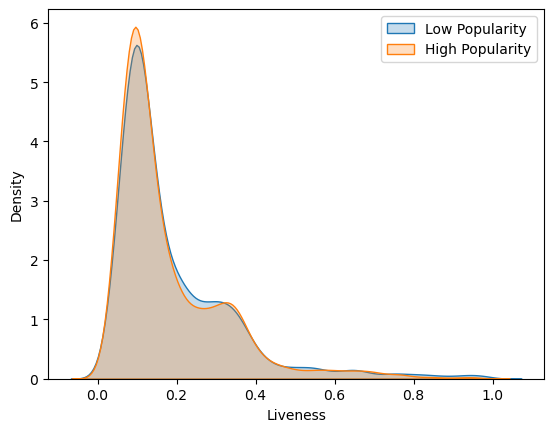

Test statistic:  7.05E+00
P value:  2.86E-11
Null hypothesis rejected


In [63]:
t_val4, p_val4 = hypothesisFunc(df, "Liveness")
checkHypo(t_val4,p_val4)

In [64]:
significance = 0.05

def two_sample_t_test(group1, group2):
  plist = stats.ttest_ind(group1, group2, equal_var=False)
  p_value = plist[1]
  print("p value is ", p_value)
  if p_value < significance:
    print("Null hypothesis rejected")
  else:
    print("Null hypothesis failed to reject")
def plot_dist(group1, group2, name1, name2):
  ax = sns.kdeplot(group1, shade=True, label = name1)
  sns.kdeplot(group2,  ax=ax, shade=True, label = name2)
  plt.legend()
  plt.show()

In [65]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency

def chi_square_test(feature1,feature2):
    sample_table=pd.crosstab(df[feature1],df[feature2])
    
    col_sum = sample_table.sum(axis=0)
    col_percentage = (sample_table)/col_sum
    print("")
    print("Column percent are->>>>>")
    print(col_percentage)
    print("")
    alpha=0.05
    
    stat, p, dof, expected = chi2_contingency(sample_table)
    if p<=alpha:
        mssg="Dependent (Reject Null Hypothesis)"
    else:
        mssg="Independent (Null Hypothesis holds true)"
        
    print('Chi-square value is: {:.2f} \tp-value: {} \tdf: {} \tOutcome: {}'.format(stat, p,dof,mssg))

In [66]:
from scipy.stats import f_oneway
def anova(sample1,sample2,sample3):
    F,p=f_oneway(sample1,sample2,sample3)  
    if p<=0.05:
        result='Reject'
    else:
        result='Accept'
    print('F Statistic: {:.2f} \tp-value: {:.5f} \tNull Hypothesis: {}'.format(F, p,result))

In [67]:
np.random.seed(40)
speechiness = np.random.choice(a= df['Speechiness'], size=100)
energy = np.random.choice(a= df['Energy'], size=100)
danceability=np.random.choice(a= df['Danceability'], size=100)
anova(speechiness,energy,danceability)

F Statistic: 568.97 	p-value: 0.00000 	Null Hypothesis: Reject


In [68]:
import scipy.stats as stats
import math

def TTest(a,popmean,s):
    tscore,p_value=stats.ttest_1samp(a= a,popmean= popmean)
    
    print('T-score is :{}\n'.format(tscore))
    print('P-value is :{:.50f}\n'.format(p_value))
    if p_value<0.05:
        print('Null Hypothesis Rejected\n')
    else:
        print('Null Hypothesis is not Rejected\n')
    if(s=='below'):
      if(tscore<0):
        print("Alternative Hypothesis: Accepted \t Left Tailed test \n")
    else:
      if(tscore>0):
        print("Alternative Hypothesis: Accepted \t Right Tailed test \n")

In [69]:
np.random.seed(40)
chrs = np.random.choice(a= df['Acousticness'], size=10000)

In [70]:
TTest(chrs,df['Acousticness'].mean(),'below')


T-score is :0.6745178343980013

P-value is :0.49999774553622466921609657219960354268550872802734

Null Hypothesis is not Rejected

